In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load the cifar10 image data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-Hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# bulid a model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
class TestAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(x_test, y_test, verbose=0)
        logs['test_accuracy'] = test_acc
# train the model and callback use customed one
history = model.fit(x_train, y_train, epochs = 20, batch_size=128, validation_split=0.1 , callbacks=[TestAccuracyCallback()])


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.3173 - loss: 1.8722 - val_accuracy: 0.5108 - val_loss: 1.3771 - test_accuracy: 0.5034
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5297 - loss: 1.3333 - val_accuracy: 0.5746 - val_loss: 1.2083 - test_accuracy: 0.5724
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5844 - loss: 1.1892 - val_accuracy: 0.6100 - val_loss: 1.1167 - test_accuracy: 0.6075
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6194 - loss: 1.0916 - val_accuracy: 0.6358 - val_loss: 1.0491 - test_accuracy: 0.6241
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.6489 - loss: 1.0109 - val_accuracy: 0.6566 - val_loss: 0.9979 - test_accuracy: 0.6469
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6631 - loss: 0.9655 - val_accuracy: 0.6690 - val_loss: 0.9542 - test_accuracy: 0.6585
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.6809 - l

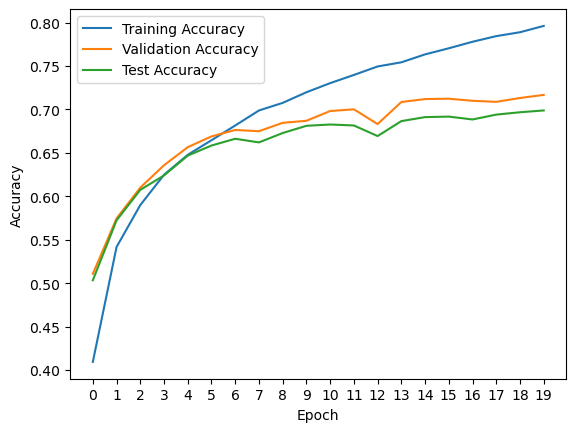

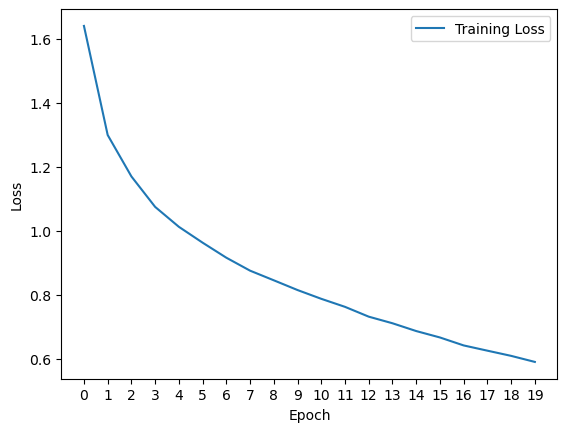

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [29]:
# plot the train, test and valid accuracy
def plot_accuracy(history):
    # plot the accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['test_accuracy'], label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(len(history.history['accuracy'])))
    plt.legend()
    plt.legend()
    plt.show()
    
    # plot the loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(len(history.history['accuracy'])))
    plt.legend()
    plt.legend()
    plt.show()
plot_accuracy(history)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# 選擇一張影像進行可視化（例如 x_test 中的第 0 張）
sample_image = np.expand_dims(x_test[0], axis=0)  # 加入批次維度

# 執行模型，取得每層的輸出
activations = activation_model.predict(sample_image)


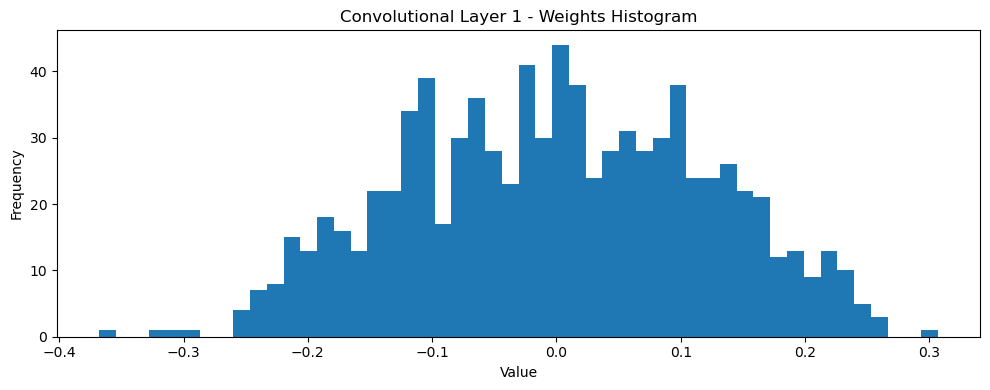

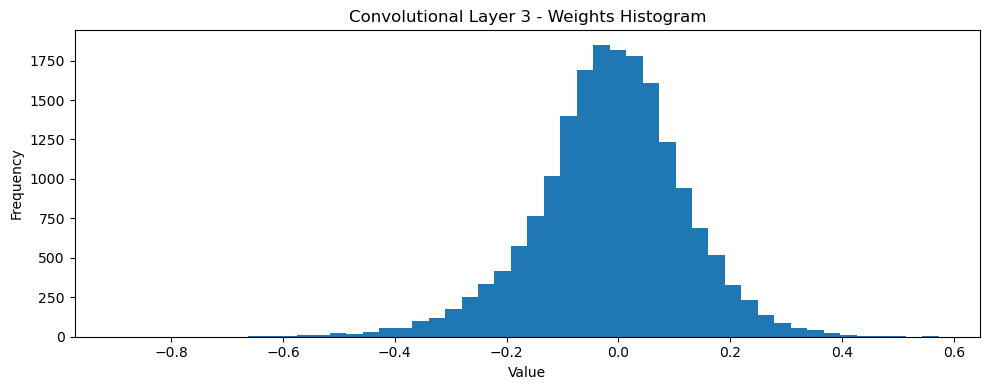

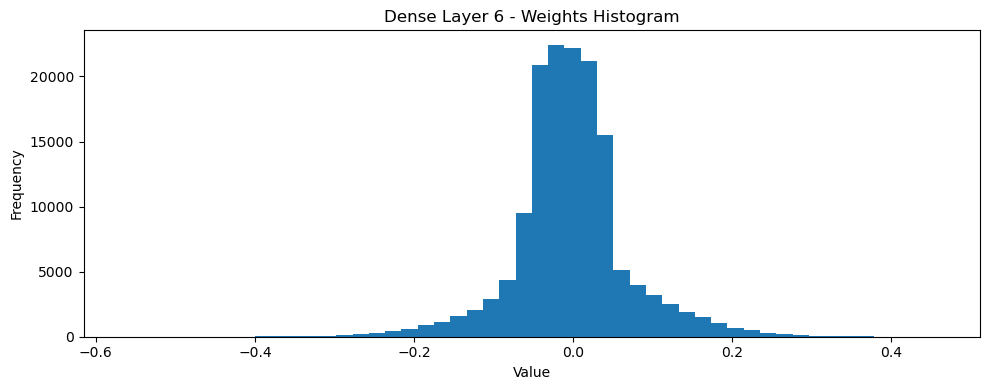

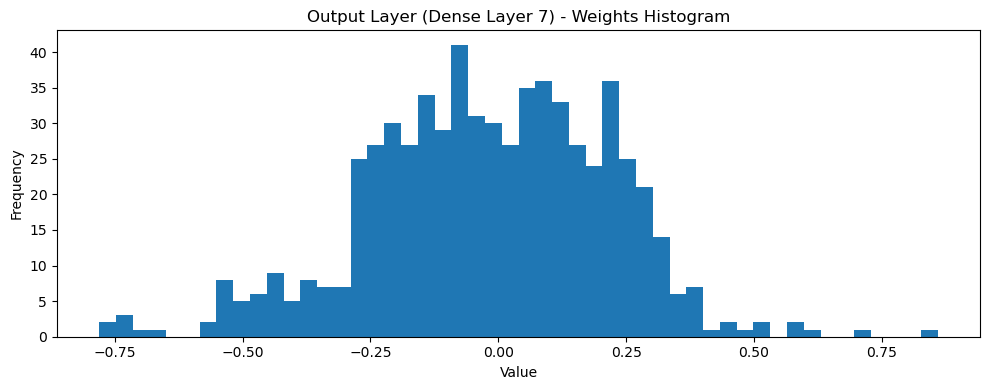

In [17]:
def plot_weights_histograms(model):
    for i, layer in enumerate(model.layers):
        weights = layer.get_weights()
        if weights: 
            weight_values = weights[0].flatten()

            # check the name of layer
            layer_type = layer.__class__.__name__
            if layer_type == 'Conv2D':
                layer_title = f'Convolutional Layer {i + 1}'
            elif layer_type == 'Dense':
                if i == len(model.layers) - 1:  # 最後一層為輸出層
                    layer_title = f'Output Layer (Dense Layer {i + 1})'
                else:
                    layer_title = f'Dense Layer {i + 1}'
            else:
                continue  # skip unusful layer
            # plot the histogram
            plt.figure(figsize=(10, 4))
            plt.hist(weight_values, bins=50)
            plt.title(f'{layer_title} - Weights Histogram')
            plt.xlabel('Value')
            plt.ylabel('Frequency')

            plt.tight_layout()
            plt.show()

plot_weights_histograms(model)  

In [18]:
import pandas as pd
layer_data = []
for layer in model.layers:
    # make sure it's not output layer
    if hasattr(layer, 'output_shape'):
        output_shape = layer.output_shape
    else:
        output_shape = layer.output.shape

    layer_data.append({
        'Layer Name': layer.name,
        'Layer Type': layer.__class__.__name__,
        'Output Shape': output_shape  
    })

# Change all into dataframe
layer_info_df = pd.DataFrame(layer_data)
print(layer_info_df)


         Layer Name    Layer Type        Output Shape
0         conv2d_41        Conv2D  (None, 30, 30, 32)
1  max_pooling2d_31  MaxPooling2D  (None, 15, 15, 32)
2         conv2d_42        Conv2D  (None, 13, 13, 64)
3  max_pooling2d_32  MaxPooling2D    (None, 6, 6, 64)
4        flatten_13       Flatten        (None, 2304)
5          dense_26         Dense          (None, 64)
6          dense_27         Dense          (None, 10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Correctly Classified Samples:


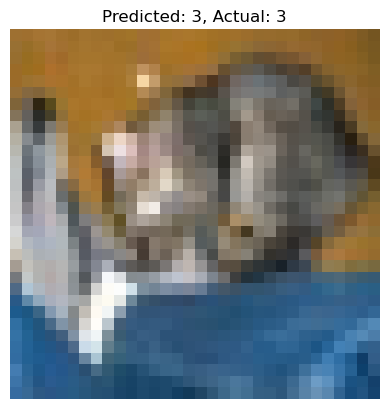

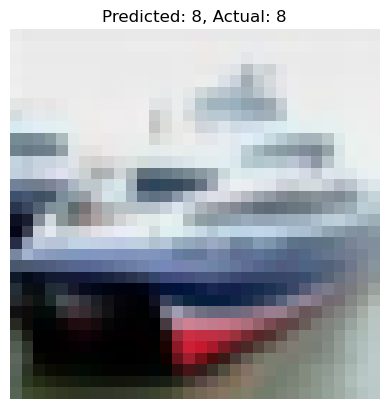

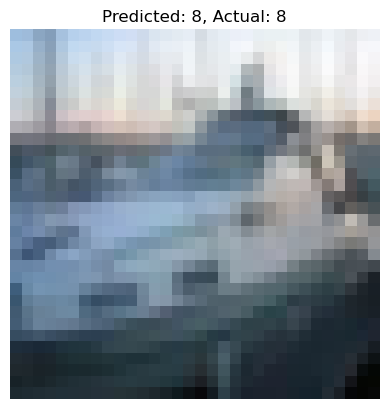

Incorrectly Classified Samples:


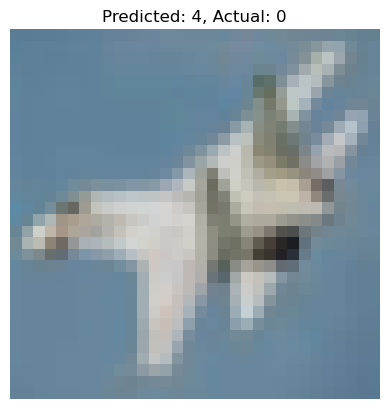

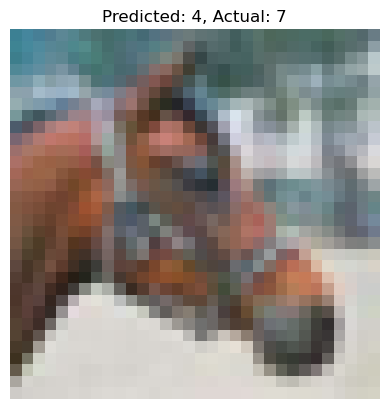

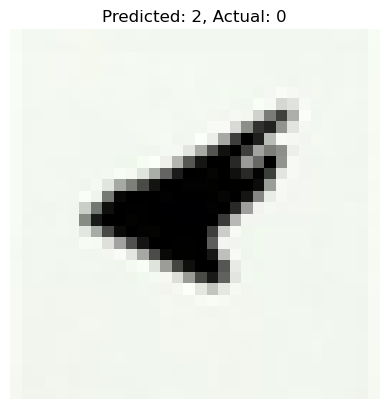

In [19]:
def display_classification_results(model, x_test, y_test, num_samples=3):
    # 取得模型預測結果
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)

    # 取得真實標籤
    if y_test.ndim > 1:
        y_test_labels = np.argmax(y_test, axis=1)
    else:
        y_test_labels = y_test  

    # 找出正確和錯誤分類的索引
    correct_indices = np.where(predicted_labels == y_test_labels)[0]
    incorrect_indices = np.where(predicted_labels != y_test_labels)[0]

    # 顯示正確分類的結果
    print("Correctly Classified Samples:")
    for i in range(min(num_samples, len(correct_indices))):
        plt.imshow(x_test[correct_indices[i]], cmap='gray')
        plt.title(f'Predicted: {predicted_labels[correct_indices[i]]}, Actual: {y_test_labels[correct_indices[i]]}')
        plt.axis('off')
        plt.show()

    # 顯示錯誤分類的結果
    print("Incorrectly Classified Samples:")
    for i in range(min(num_samples, len(incorrect_indices))):
        plt.imshow(x_test[incorrect_indices[i]], cmap='gray')
        plt.title(f'Predicted: {predicted_labels[incorrect_indices[i]]}, Actual: {y_test_labels[incorrect_indices[i]]}')
        plt.axis('off')
        plt.show()
display_classification_results(model, x_test, y_test, num_samples=3)


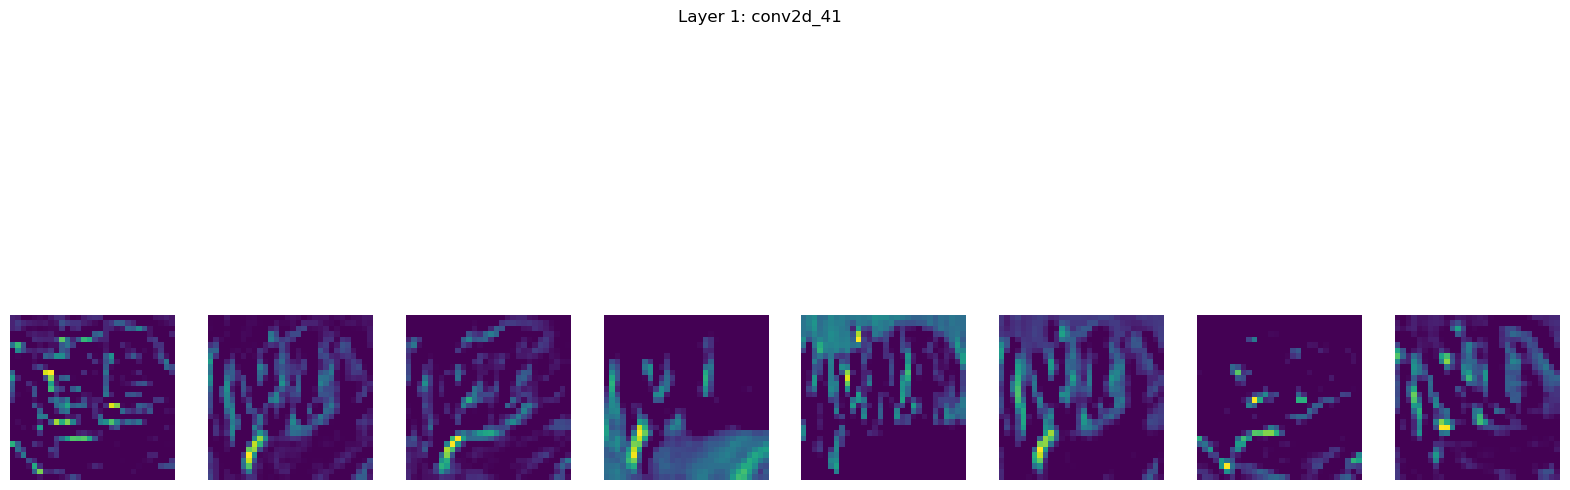

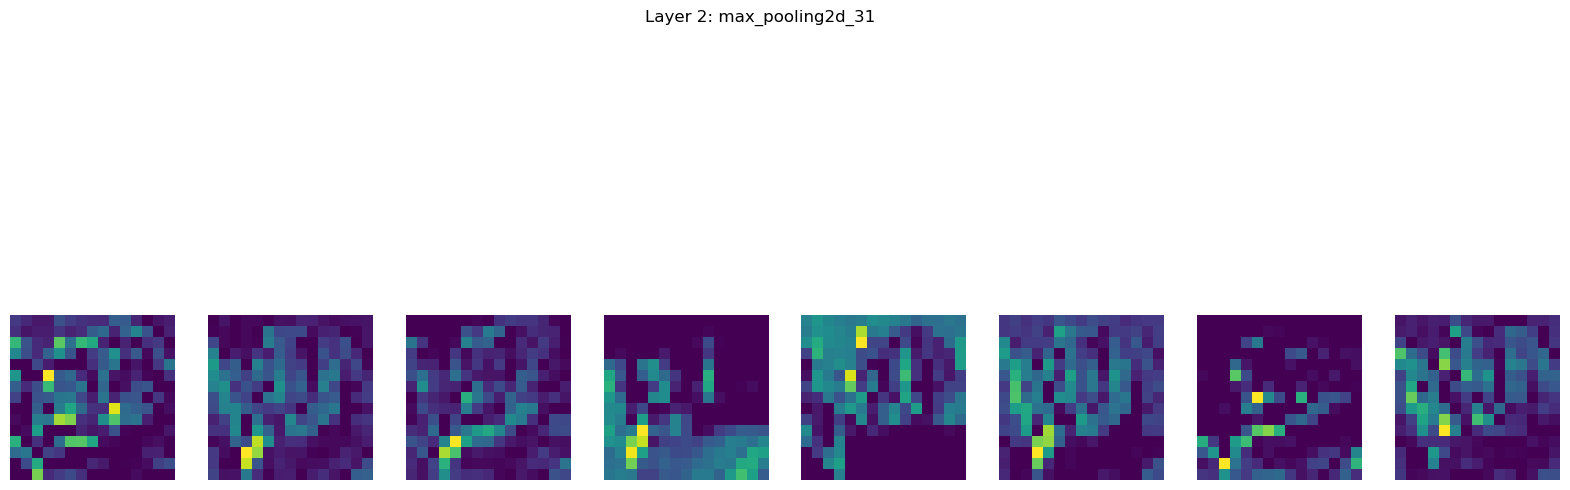

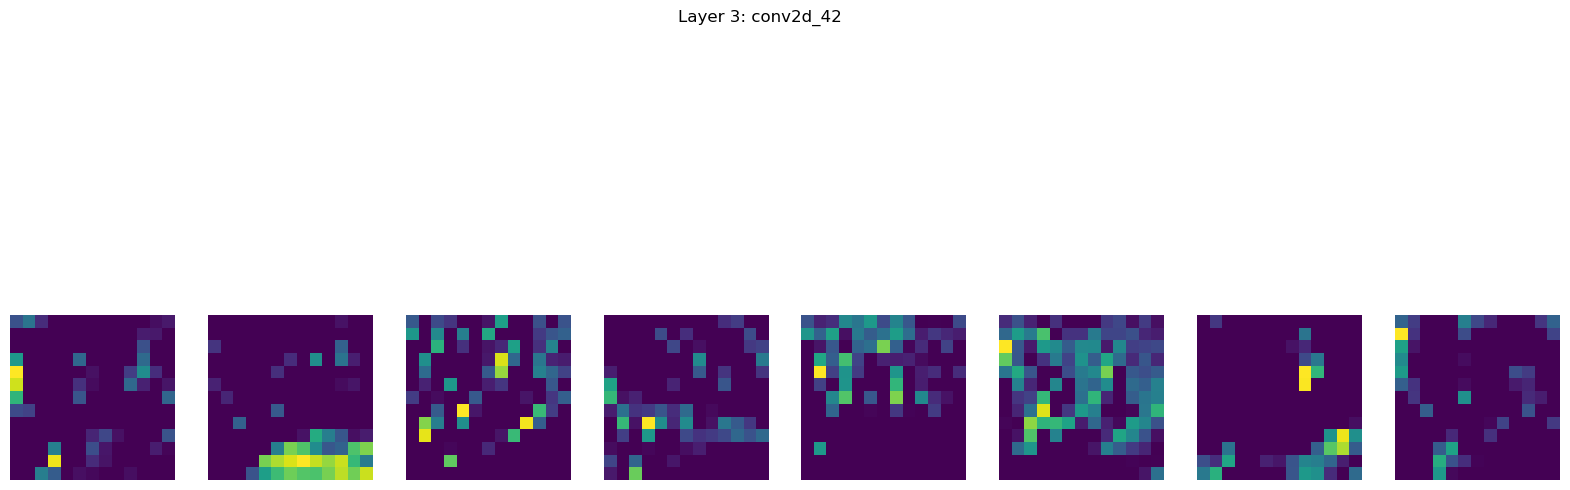

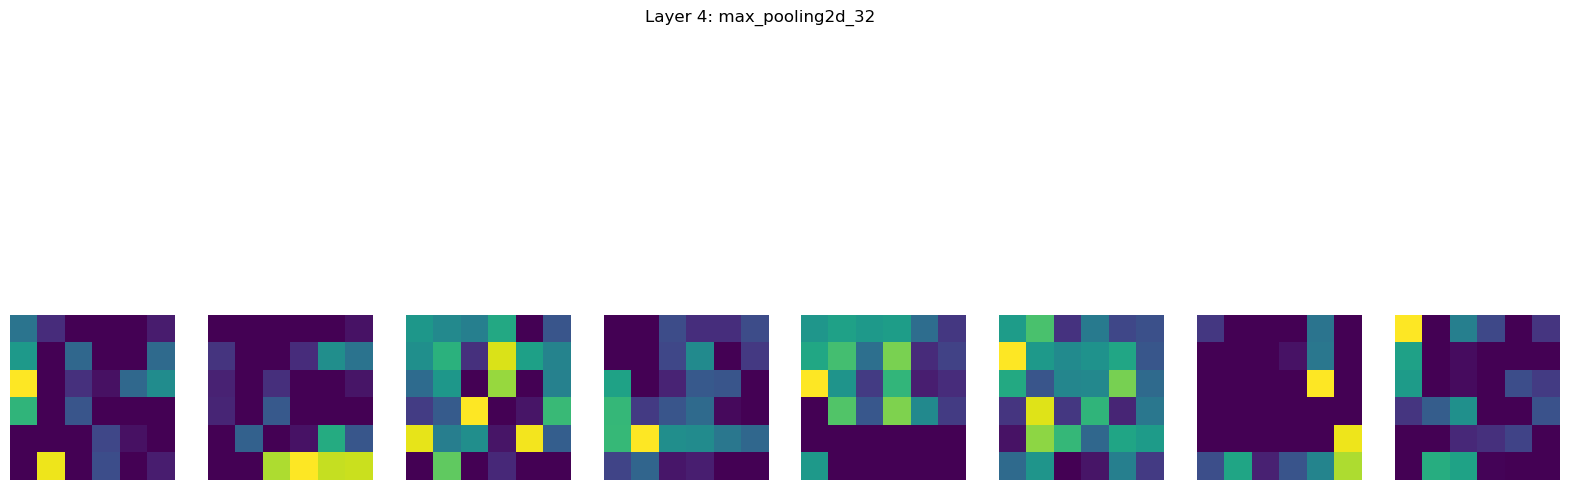

In [20]:
# 視覺化每層的特徵圖
for layer_index, activation in enumerate(activations):
    # 取得該層的濾波器數量和特徵圖大小
    num_filters = activation.shape[-1] if len(activation.shape) == 4 else 1
    size = activation.shape[1] if len(activation.shape) == 4 else activation.shape[0]

    # 只處理卷積層或池化層的 4 維輸出
    if len(activation.shape) == 4:
        fig, ax = plt.subplots(1, min(num_filters, 8), figsize=(20, 8))
        fig.suptitle(f"Layer {layer_index + 1}: {model.layers[layer_index].name}")
        
        for i in range(min(num_filters, 8)):
            ax[i].imshow(activation[0, :, :, i], cmap='viridis')
            ax[i].axis('off')
        plt.show()
    else:
         break


In [24]:
from tensorflow.keras import regularizers
model_L2 = Sequential([
    Input(shape=(32, 32, 3)),  # 使用 Input 層來指定輸入形狀
    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(0.01))
])
model_L2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
class TestAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(x_test, y_test, verbose=0)
        logs['test_accuracy'] = test_acc
# 訓練模型
history_L2 = model_L2.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1 , callbacks=[TestAccuracyCallback()])

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2776 - loss: 2.5944 - val_accuracy: 0.4188 - val_loss: 1.9125 - test_accuracy: 0.4129
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4304 - loss: 1.8879 - val_accuracy: 0.4538 - val_loss: 1.8225 - test_accuracy: 0.4560
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4528 - loss: 1.8218 - val_accuracy: 0.4614 - val_loss: 1.8034 - test_accuracy: 0.4631
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4654 - loss: 1.7936 - val_accuracy: 0.4644 - val_loss: 1.7807 - test_accuracy: 0.4606
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4690 - loss: 1.7752 - val_accuracy: 0.4870 - val_loss: 1.7292 - test_accuracy: 0.4883
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4831 - loss: 1.7443 - val_accuracy: 0.4872 - val_loss: 1.7315 - test_accuracy: 0.4793
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4879 - loss: 1.

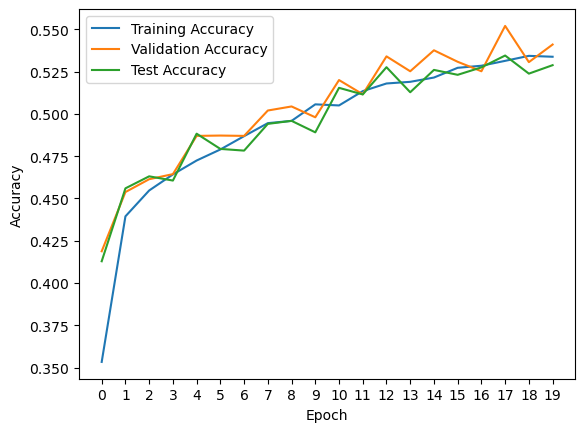

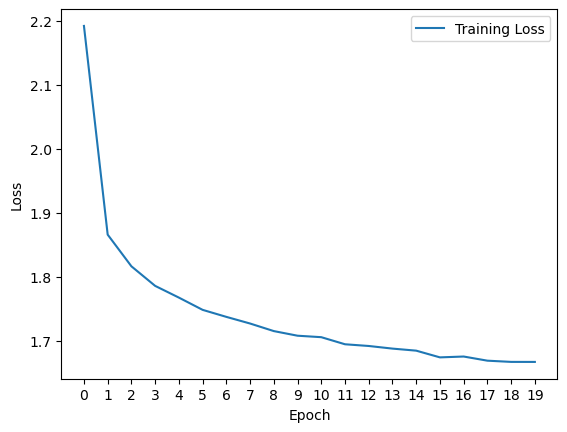

In [30]:
plot_accuracy(history_L2)

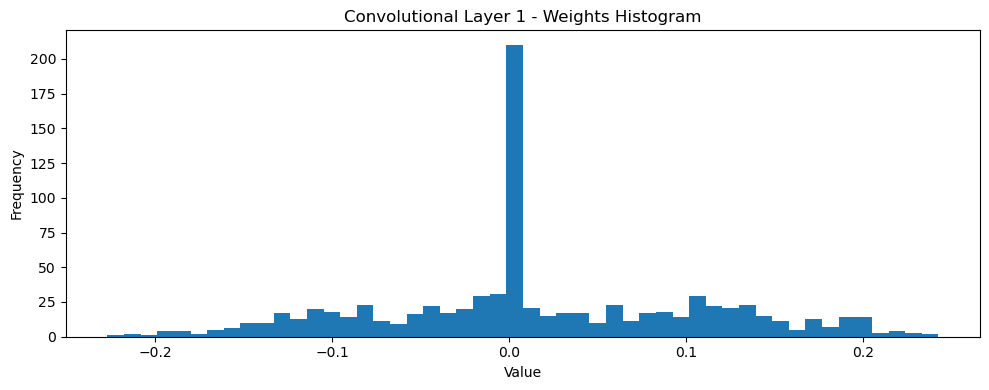

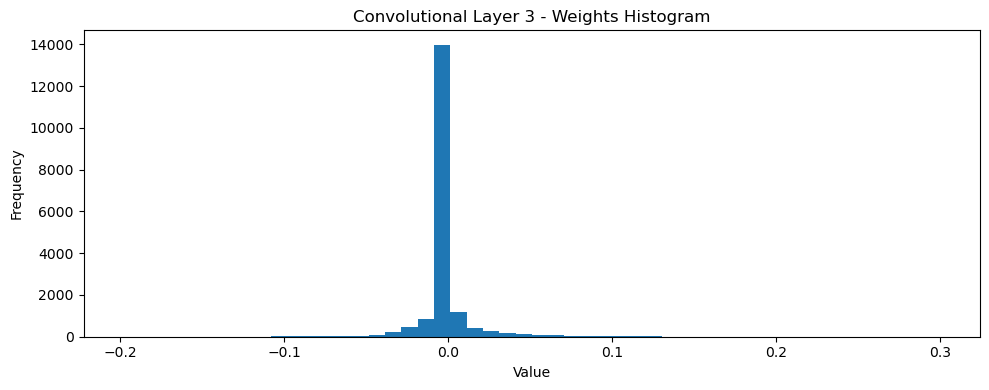

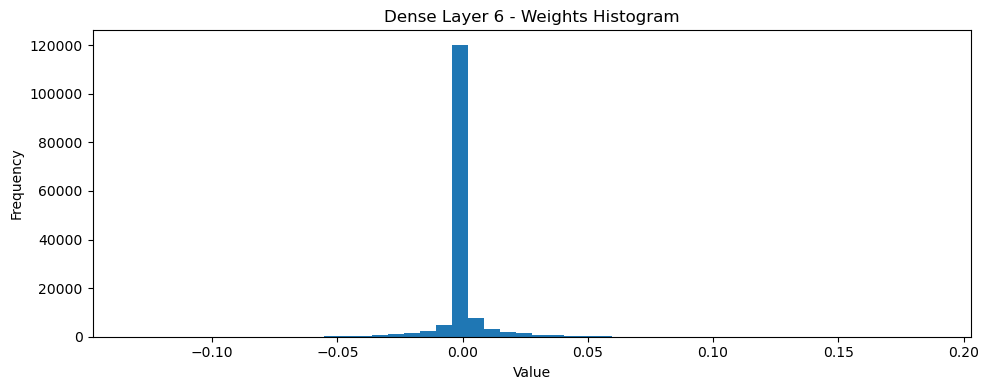

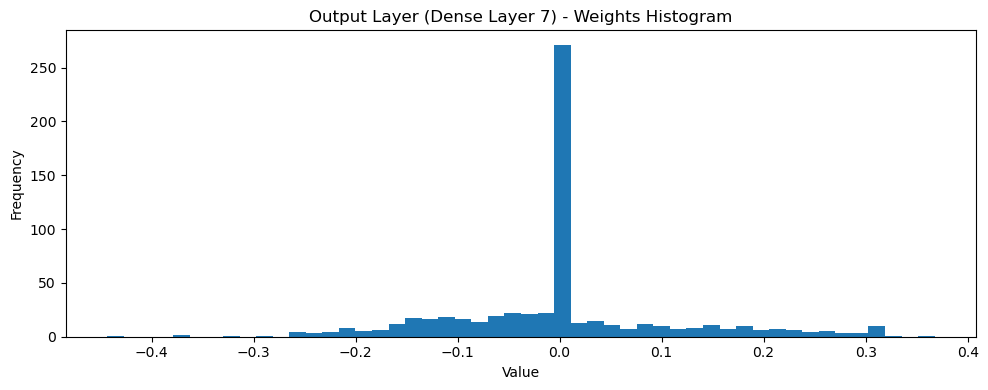

In [27]:
plot_weights_histograms(model_L2) 